In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv('HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.info()
#check info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
#drop duplicates and NaNs rows

In [7]:
#delete redundant columns (or keeping the important ones)

columns_to_keep = [
    'OverTime', 'MaritalStatus', 'JobRole', 'Gender',
    'EducationField', 'Department', 'BusinessTravel', 
    'Age', 'TotalWorkingYears', 'Education', 'NumCompaniesWorked', 
    'DistanceFromHome', 'Attrition', 'PercentSalaryHike', 'PerformanceRating'
]

df2 = df.copy()

for i in df.columns:
    if i in columns_to_keep:
        continue
    else:
        df2.drop(columns=[i], inplace=True)

In [18]:
#create a numeric data frame
df_num = df2.select_dtypes(int)
df_num['OverTime']=df2['OverTime'].map({'Yes': 1, 'No': 0})
df_num

,Age,DistanceFromHome,Education,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,TotalWorkingYears,OverTime
0,41,1,2,8,11,3,8,1
1,49,8,1,1,23,4,10,0
2,37,2,2,6,15,3,7,1
3,33,3,4,1,11,3,8,1
4,27,2,1,9,12,3,6,0
...,...,...,...,...,...,...,...,...
1465,36,23,2,4,17,3,17,0
1466,39,6,1,4,15,3,9,0
1467,27,4,3,1,20,4,6,1
1468,49,2,3,2,14,3,17,0


# Plot a correlation map for all numeric variable Overtime

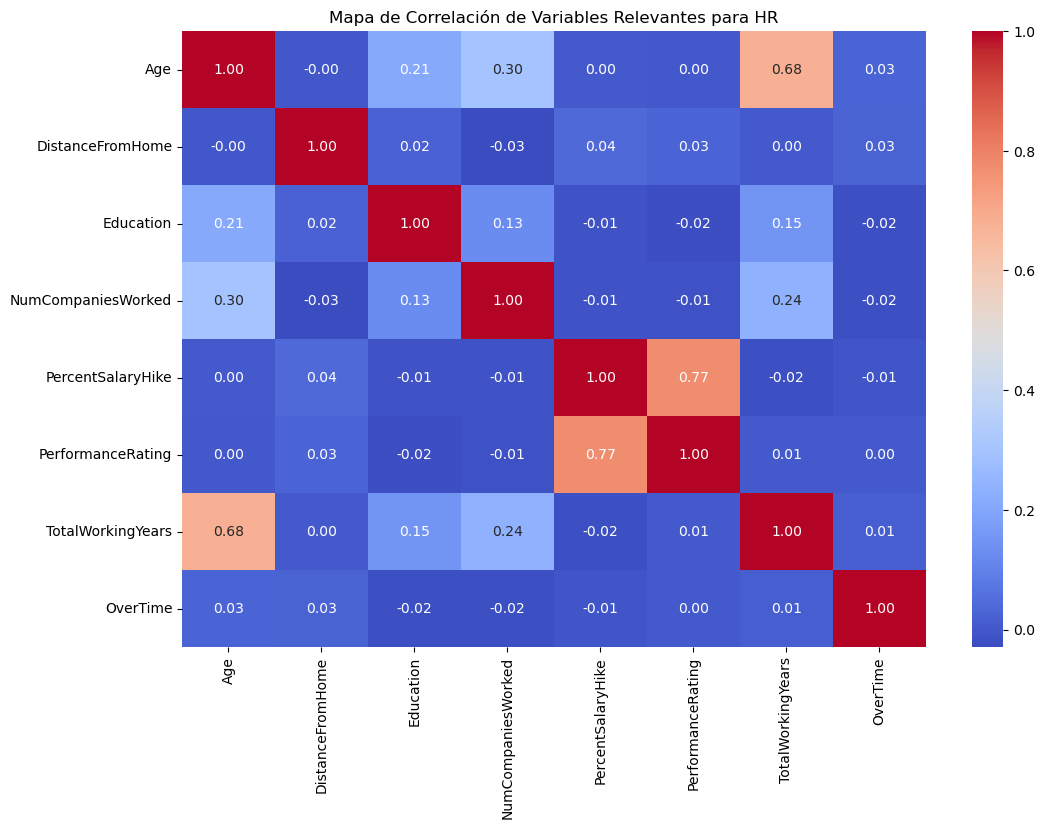

In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_num.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Mapa de Correlación de Variables Relevantes para HR")
plt.show()

### We can see a 2 big correlations:
### PercentSalaryHike - PerformanceRating
That make sense because it would be normal to think bigger is your hike better is your performance at the company.
### TotalWorkingYears - Age
This make sense too, because it is normal to think that as a general rule, the oldest people in the company are those who have been working the longest. 

# Marital Status 

<Axes: xlabel='MaritalStatus', ylabel='Count'>

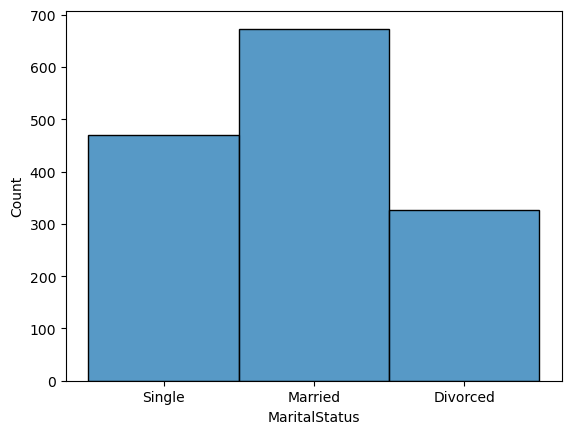

In [21]:
sns.histplot(df2['MaritalStatus'])

# Job Role - Gender

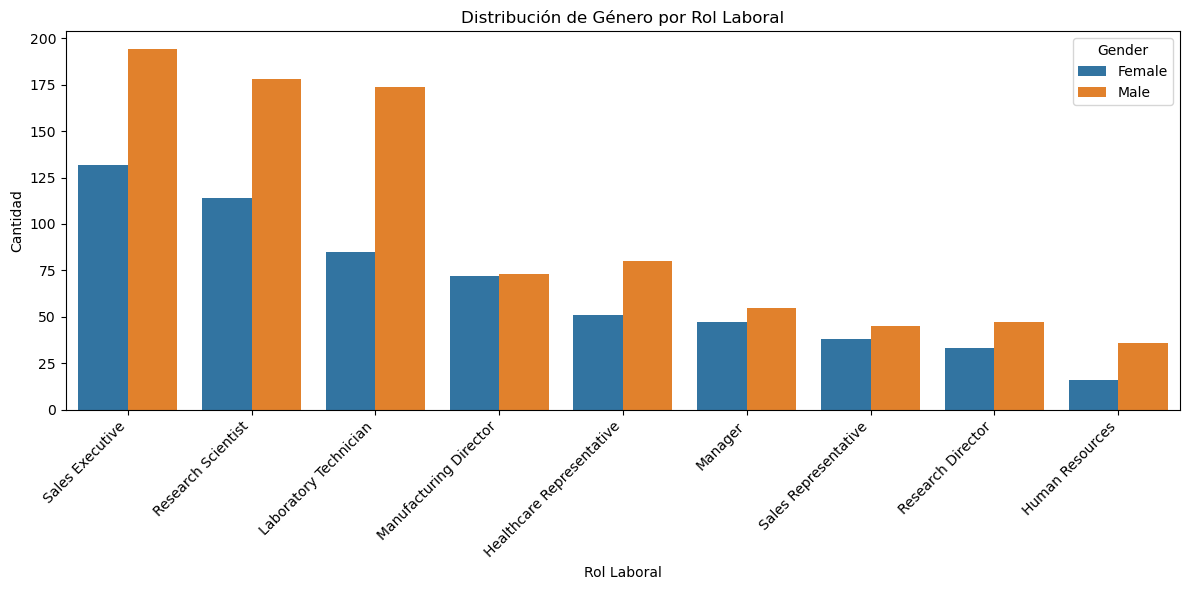

In [27]:
plt.figure(figsize=(12, 6))
sns.countplot(x='JobRole', hue='Gender', data=df)
plt.title('Distribución de Género por Rol Laboral')
plt.xlabel('Rol Laboral')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Education Field - Department

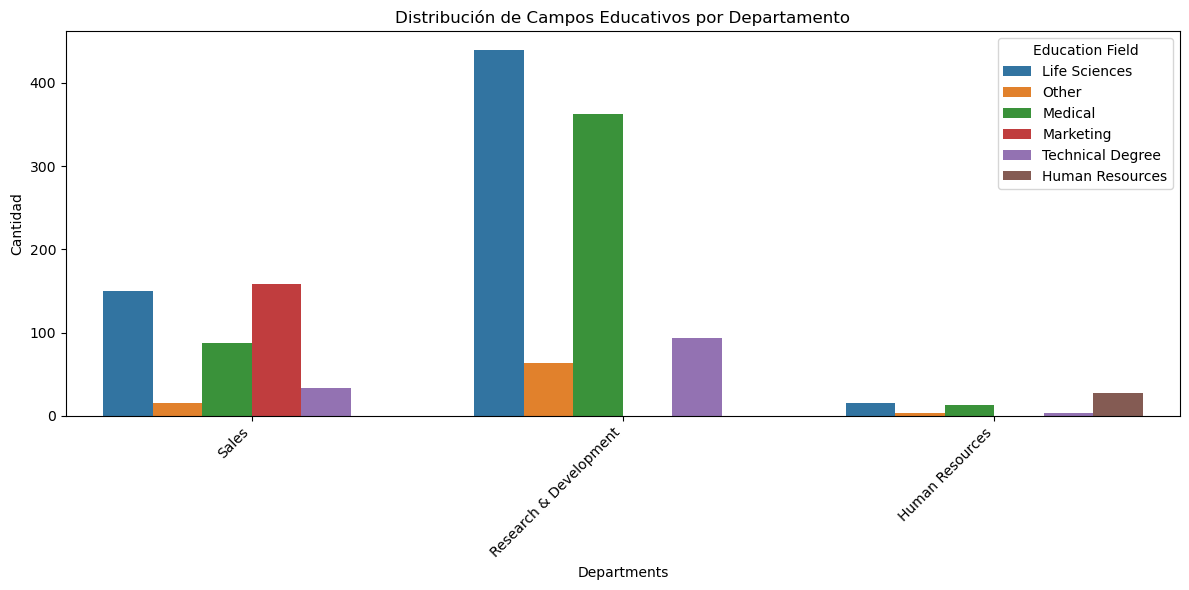

In [29]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Department', hue='EducationField', data=df)
plt.title('Distribución de Campos Educativos por Departamento')
plt.xlabel('Departments')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')  
plt.legend(title='Education Field')
plt.tight_layout()
plt.show()

# Bussiness Travel - Performance Rating

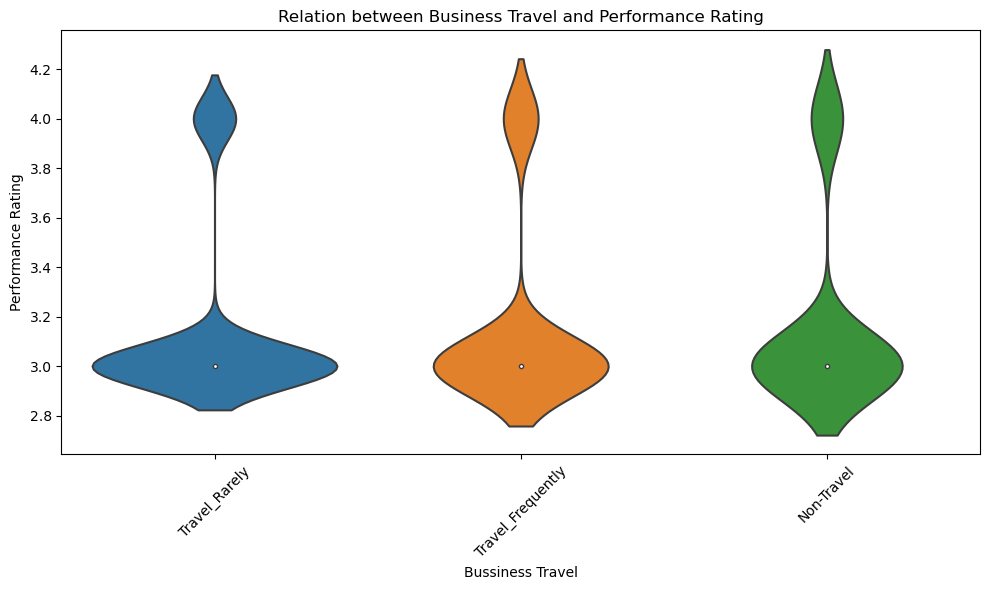

In [32]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='BusinessTravel', y='PerformanceRating', data=df)
plt.title('Relation between Business Travel and Performance Rating')
plt.xlabel('Bussiness Travel')
plt.ylabel('Performance Rating')
plt.xticks(rotation=45)  # Rotamos las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.show()

# Relation between Overtime and Age

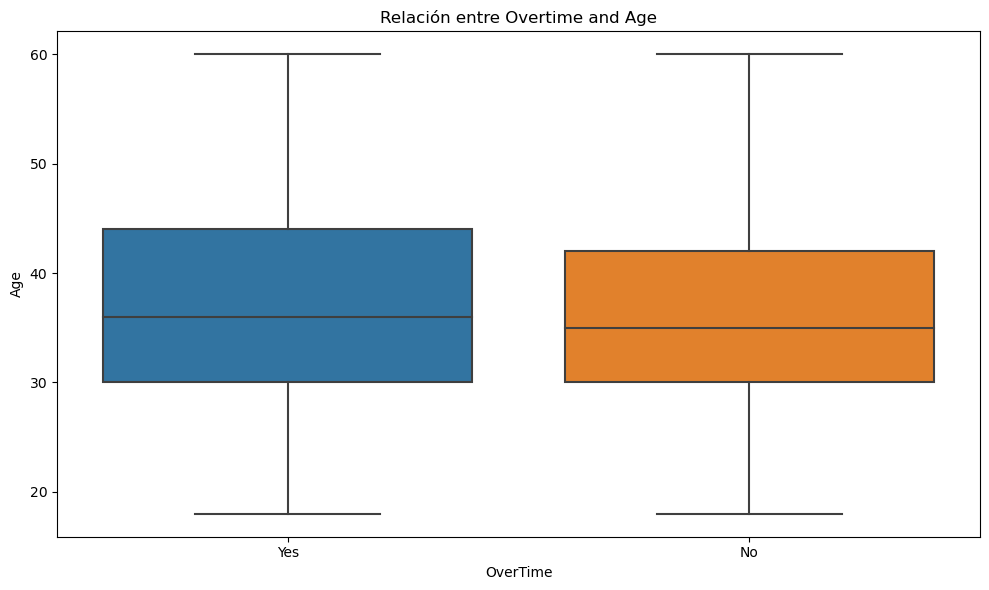

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverTime', y='Age', data=df)
plt.title('Relación entre Overtime and Age')
plt.xlabel('OverTime')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

# Total Working Year - Age - Education Level


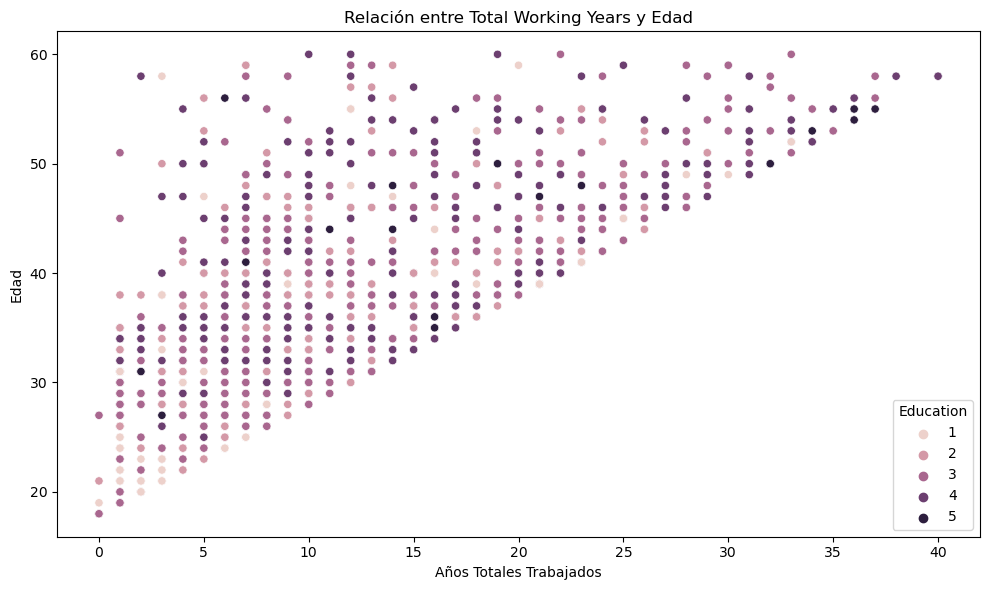

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalWorkingYears', y='Age', hue='Education', data=df)
plt.title('Relación entre Total Working Years y Edad')
plt.xlabel('Años Totales Trabajados')
plt.ylabel('Edad')
plt.tight_layout()
plt.show()

# Number of Companies Worked vs Performance Rating

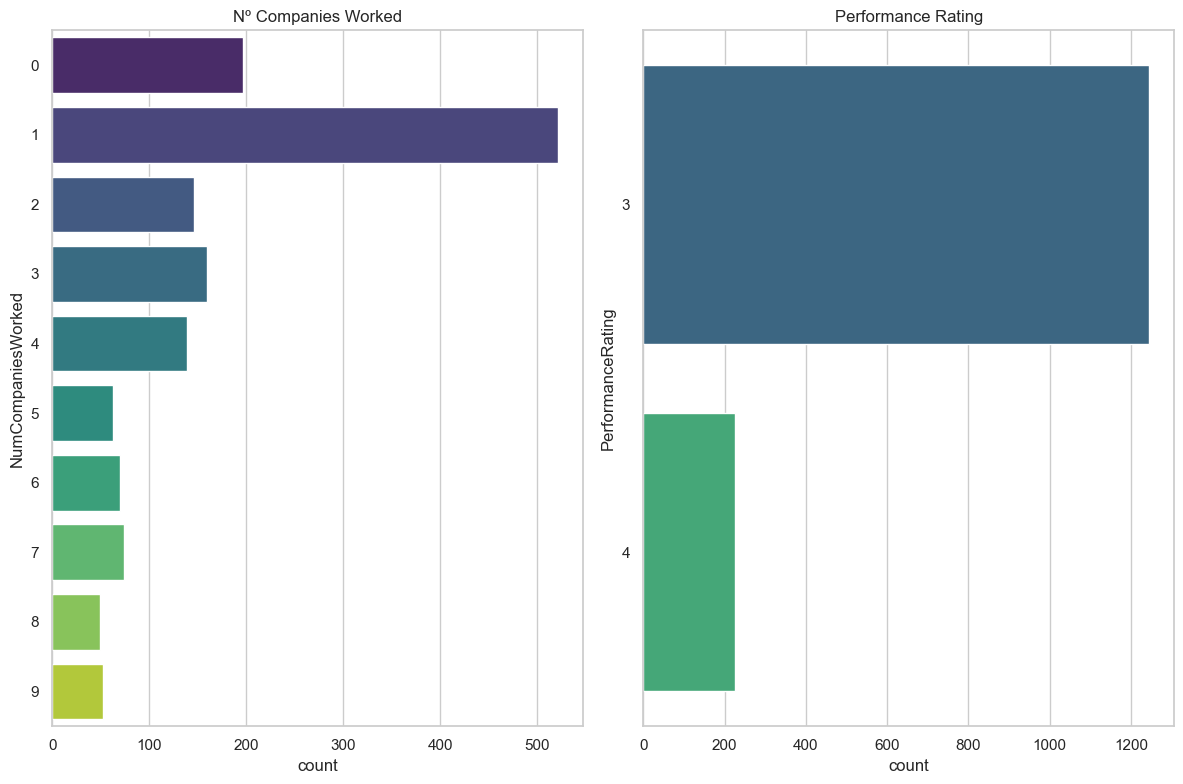

In [39]:
sns.set(style="whitegrid")


plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)


sns.countplot(y='NumCompaniesWorked', data=df, palette="viridis")
plt.title('Nº Companies Worked')


plt.subplot(1, 2, 2)


sns.countplot(y='PerformanceRating', data=df, palette="viridis")
plt.title('Performance Rating')


plt.tight_layout()
plt.show()

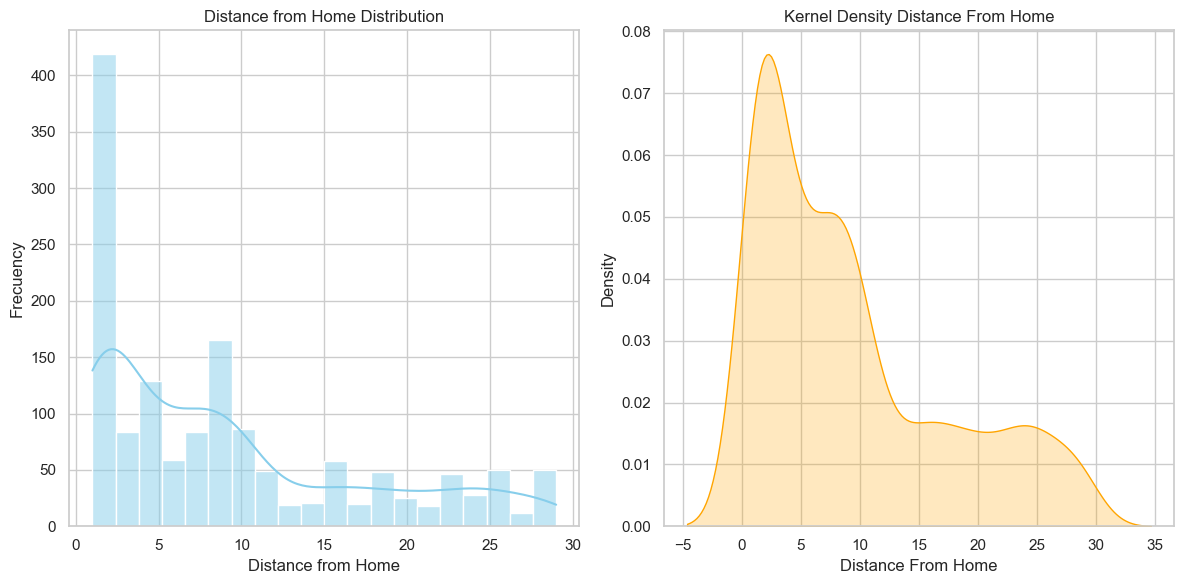

In [41]:
sns.set(style="whitegrid")


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.histplot(data=df, x='DistanceFromHome', kde=True, color='skyblue', bins=20)
plt.title('Distance from Home Distribution')
plt.xlabel('Distance from Home')
plt.ylabel('Frecuency')


plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x='DistanceFromHome', color='orange', fill=True)
plt.title('Kernel Density Distance From Home')
plt.xlabel('Distance From Home')
plt.ylabel('Density')


plt.tight_layout()
plt.show()